In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
numSim = 1
numCustomers = 5000

lam = 1
mu = 3

# set the seed to 5
np.random.seed(5)

In [37]:
A = np.zeros(numCustomers) # arrivals
T = np.zeros(numCustomers) # start of service
S = np.zeros(numCustomers) # service duration 
D = np.zeros(numCustomers) # departure time
W = np.zeros(numCustomers) # wait time
I = np.zeros(numCustomers) # idle time
Xs = np.zeros(numCustomers) # interarrival time

A[0] = np.random.exponential(1/lam)
T[0] = A[0]
S[0] = np.random.exponential(1/mu)
D[0] = T[0] + S[0]
W[0] = 0
I[0] = T[0]

for n in range(1, numCustomers):
    # X = np.random.exponential(1/lam) # interarrival time
    #generate X as a gamma distribution with mean 1/lam and variance 2
    X = np.random.gamma(.5, 1/lam/.5)
    Xs[n] = X
    A[n] = A[n-1] + X # arrival time
    T[n] = max(A[n], T[n-1] + S[n-1]) # start of service
    S[n] = np.random.exponential(1/mu) # service time
    D[n] = T[n] + S[n] # departure time
    W[n] = T[n] - A[n] # wait time
    I[n] = I[n-1] + (T[n] - D[n-1]) # total idle time

print("Mean wait time: ", np.mean(W))
print("Variance wait time: ", np.var(W))

# print the utilization
print("Utilization: ", 1 - I[-1] / D[-1])



Mean wait time:  0.3604140494735806
Variance wait time:  0.40578855891984633
Utilization:  0.33944190853994494


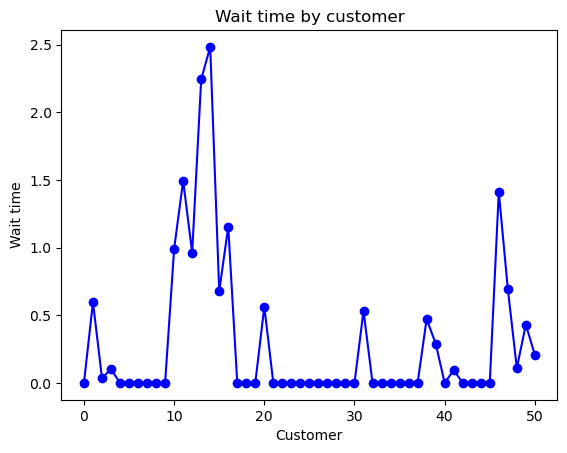

In [38]:
# plot the waiting time by customer
plt.plot(W[:51], 'bo-')
plt.xlabel("Customer")
plt.ylabel("Wait time")
plt.title("Wait time by customer")
plt.show()
